# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 


## Group Number : 10

## Student 1 
### Name : Vishruty Mittal
### ID : 5584825

## Student 2
### Name : Sayak Mukherjee
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [1]:
#Uncomment for colab

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#Uncomment for colab

# !mkdir data
# !cp '/content/drive/MyDrive/Colab Notebooks/CDA/cda-lab-2.zip' 'data/' # Location of data zipped file
# %cd data/
# !unzip cda-lab-2.zip
# %cd ..

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from tqdm import tqdm
from itertools import tee
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors

In [5]:
# Load Data
train_df = pd.read_csv('data/train_data.csv', index_col=None)

test_df = pd.read_csv('data/test_data.csv', index_col=None)

val_df = pd.read_csv('data/val_data.csv', index_col=None)

train_df.head()

,Id,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
0,0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
1,1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
2,2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
3,3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
4,4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0


## 1. Familiarization task – 1 A4

### 1a. Plot visualizations 

In [6]:
datasets = ['train', 'val']

In [7]:
train_viz = train_df.drop(columns=['Id','Timestamp', 'Label'], axis = 1)
val_viz = val_df.drop(columns=['Id','Timestamp', 'Label'], axis = 1)

In [8]:
# get names of the signals

sensors = train_viz.columns

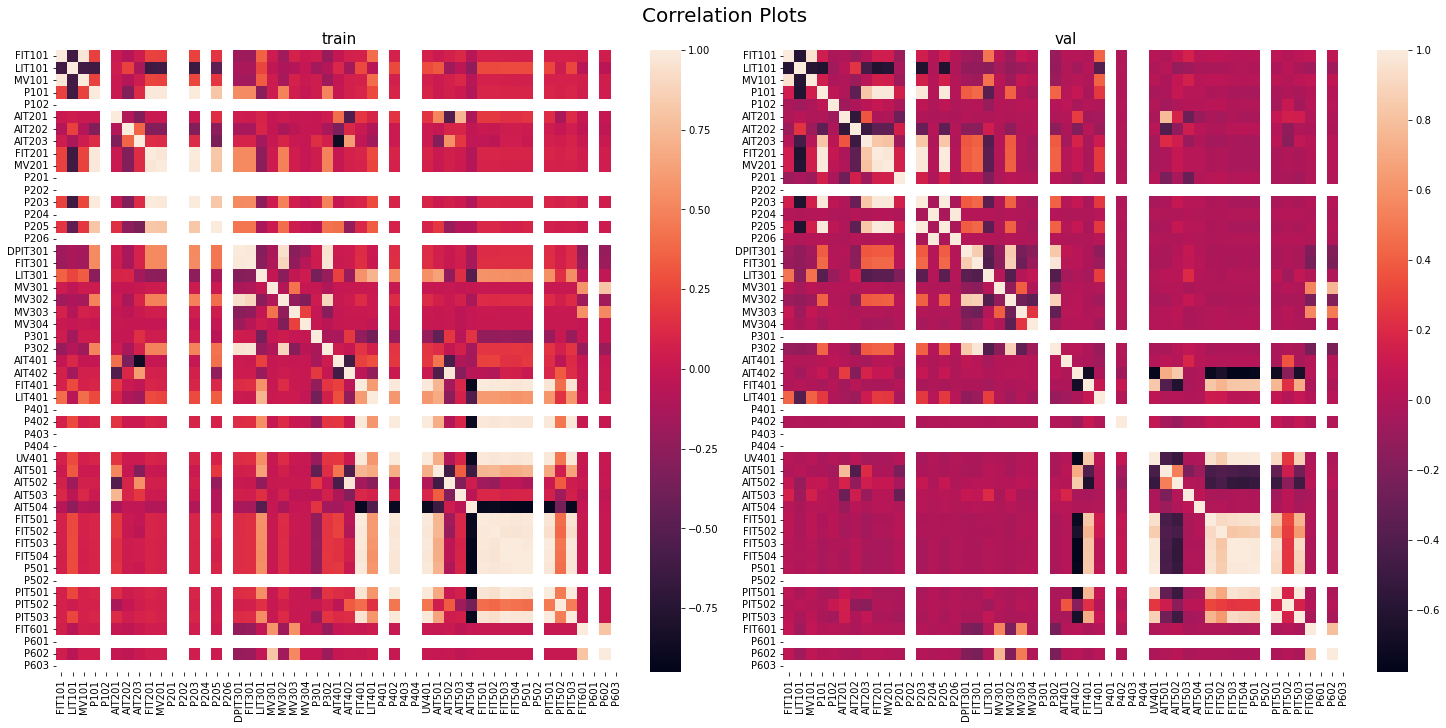

In [9]:
#plotting a correlation matrix

fig, ax = plt.subplots(1,2, figsize=(20,10), constrained_layout=True)

for pos in range(len(datasets)):
    if datasets[pos] == 'train':
        corr = train_viz.corr()
    else:
        corr = val_viz.corr()

    ax[pos].set_title(datasets[pos], fontsize=15)

    sns.heatmap(corr, 
                ax = ax[pos],
                xticklabels = corr.columns.values, 
                yticklabels = corr.columns.values)
    
fig.suptitle('Correlation Plots', fontsize=20)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:01<00:00, 30.88it/s]


Loading the plots


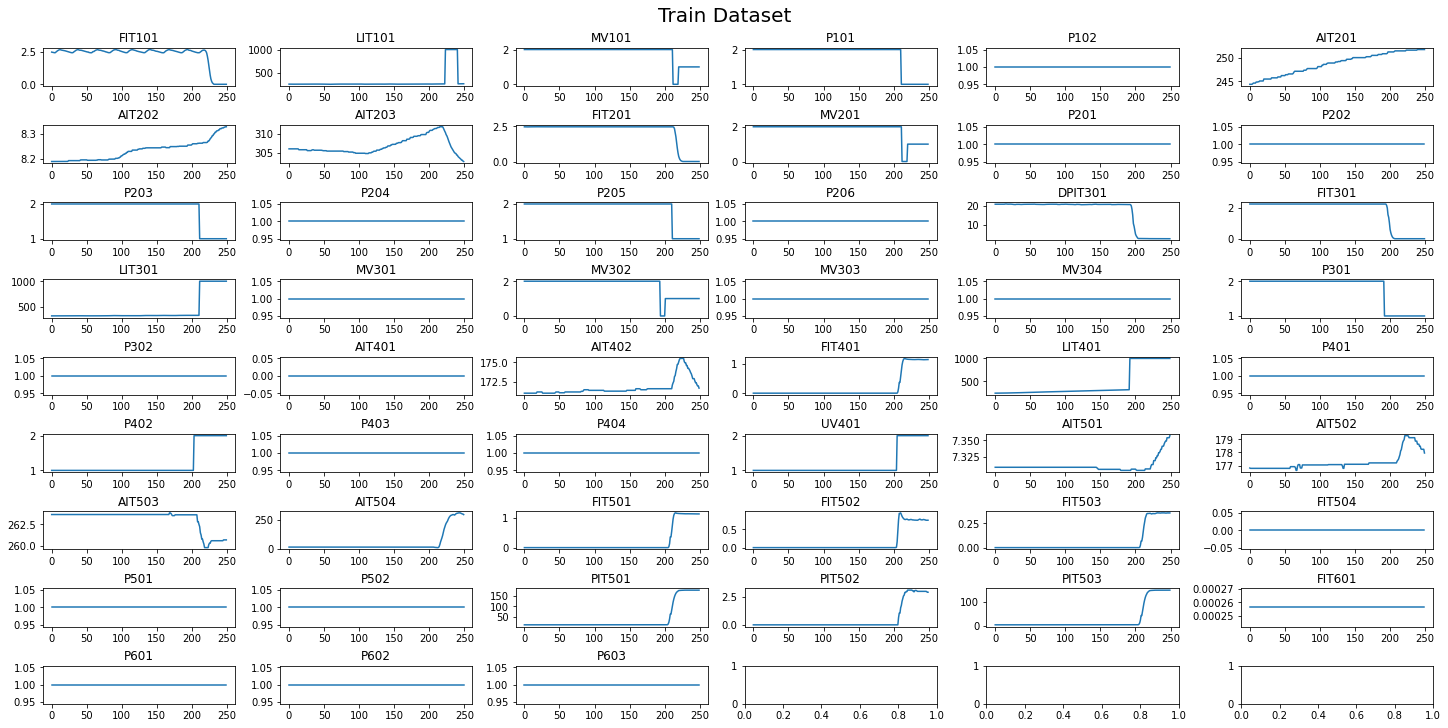

In [10]:
# PLEASE NOTE: Can take time to execute!

# plot segments of each signal
fig, axs = plt.subplots(9, 6, constrained_layout=True)
fig.set_size_inches((20,10))

for i in tqdm(range(len(sensors))):
       a,b = (int(i/6), i%6)
       axs[a,b].plot(range(250), train_viz[sensors[i]][0:250])
       axs[a,b].set_title(sensors[i])

fig.suptitle('Train Dataset', fontsize=20)
print("Loading the plots")
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:01<00:00, 37.22it/s]


Loading the plots


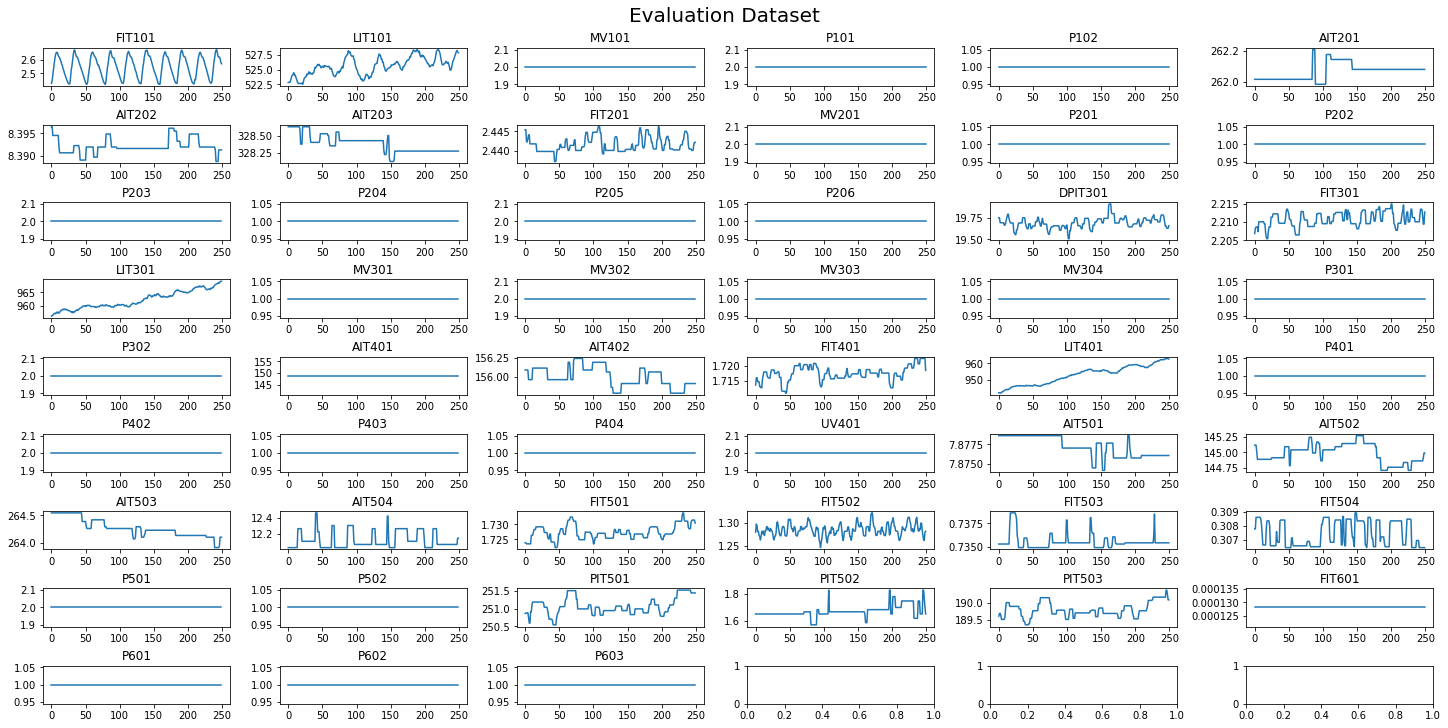

In [11]:
# PLEASE NOTE: Can take time to execute!

# plot segments of each signal
fig, axs = plt.subplots(9, 6, constrained_layout=True)
fig.set_size_inches((20,10))

for i in tqdm(range(len(sensors))):
       a,b = (int(i/6), i%6)
       axs[a,b].plot(range(250), val_viz[sensors[i]][0:250])
       axs[a,b].set_title(sensors[i])

fig.suptitle('Evaluation Dataset', fontsize=20)
print("Loading the plots")
plt.show()

### 1b. Answers to the three questions

**1. What types of signals are there?** There are signals corresponding to sensors and actuators. Sensor signals are continuous captured at various components of the system. Actuators are discrete signals signifying turning on and off a particular component.

**2. Are the signals correlated? Do they show cyclic behavior?** Some of the signals are correlated as can be observed in the correlation plots. For example LIT101 is found to be highly correlated with P101. 

## 2. LOF task – 1/2 A4 – Individual

In [12]:
'''
As LOF takes a long time to execute, we had to restrict to implementing
this section only with the sampled data points!!
'''

NUM_SAMPLES = 1000 # number of data points for LOF tasks

In [13]:
# Get a fraction of data points as sample maintaining class distribution

val_X = val_df.drop(['Label'], axis='columns')
val_y = val_df['Label']
col_names = val_df.columns

val_X_benign = val_X[val_y == 0]
val_X_anomaly = val_X[val_y == 1]

num_benign, num_anomaly = int(NUM_SAMPLES/2), int(NUM_SAMPLES/2)

if num_benign > len(val_X_benign):
    num_benign > len(val_X_benign)

if num_anomaly > len(val_X_anomaly):
    num_anomaly > len(val_X_anomaly)
    
frac_benign, frac_anomaly = num_benign/len(val_X_benign), num_anomaly/len(val_X_anomaly)   

val_X = pd.concat([val_X_benign.sample(frac=frac_benign), val_X_anomaly.sample(frac=frac_anomaly)], 
                  ignore_index=True).reset_index(drop=True)

val_y = pd.concat([pd.Series(np.full(num_benign, 0)), 
                   pd.Series(np.full(num_anomaly, 1))], 
                  ignore_index=True).reset_index(drop=True)
                  
val_sample = pd.concat([val_X.reset_index(drop=True), val_y.reset_index(drop=True)], axis=1)
val_sample.columns = col_names

In [14]:
# Sample training datapoints

train_sample = train_df.sample(frac=(NUM_SAMPLES/len(train_df)))

In [15]:
print(f'Train Samples: {train_sample.shape[0]}')
print(f'Validation Samples: {val_sample.shape[0]}')

Train Samples: 1000
Validation Samples: 1000


In [16]:
def normalise_dataframe(dataframe):
    '''
    Wrapper for scikit-learn normalize function
    for handling string columns
    '''

    # take only the non-str columns for normalisation
    col_names = dataframe.columns
    dataframe_str_cols = dataframe[['Id','Timestamp', 'Label']]
    dataframe = dataframe.drop(['Id','Timestamp', 'Label'], axis=1)
    normalized_cols = dataframe.columns

    dataframe = pd.DataFrame(normalize(dataframe, axis=0), columns=normalized_cols)

    dataframe = pd.concat([dataframe.reset_index(drop=True), dataframe_str_cols.reset_index(drop=True)], axis=1)

    return dataframe[col_names]

In [17]:
# As LOF is affected by scale, normalise the features

train_sample  = normalise_dataframe(train_sample)
val_sample = normalise_dataframe(val_sample)

In [18]:
def exec_lof(train_df, test_df, nearest_neighbor, print_perf=True):

    # Fit the LoF model
    lof = LocalOutlierFactor(n_neighbors=nearest_neighbor, 
                             algorithm='ball_tree', 
                             metric='minkowski', 
                             p=2, 
                             contamination="auto", 
                             novelty=True)

    lof.fit(train_df.drop(columns=['Id','Timestamp', 'Label'], axis = 1).values)

    # Fetch predictions and sample scores
    is_inlier = lof.predict(test_df.drop(columns=['Id','Timestamp', 'Label'], axis = 1)) # 1 inlier, -1 outlier
    is_inlier = is_inlier == -1
    is_inlier = is_inlier.astype(float)

    # performance evalutaion
    scores = lof.negative_outlier_factor_

    _, fp, _, tp = confusion_matrix(test_df.Label, is_inlier).ravel()

    if print_perf:

        # Performance Metrics
        print(f'True Positives: {tp}')
        print(f'False Positives: {fp}')
        print(f'F1: {f1_score(test_df.Label, is_inlier)}')
        print(f'Precision: {precision_score(test_df.Label, is_inlier)}')
        print(f'Recall: {recall_score(test_df.Label, is_inlier)}')
        print(f'Accuracy: {accuracy_score(test_df.Label, is_inlier)}')

    return lof, is_inlier, scores, (fp, tp)

In [19]:
# PLEASE NOTE: Each run takes a LONG time for larger samples
# Hence it was run on only limited data points. 
# Thus we did not any noticeable performance gain

# Commented for performance reasons.

# for tuning the nearest neighbor hyper-parameter
nns = [nn for nn in range(1, 300)]
fps = []
tps = []

for nn in tqdm(nns):
    _, _, _, (exec_fp, exec_tp) = exec_lof(train_sample, val_sample, nearest_neighbor = nn, print_perf = False)
    fps.append(exec_fp)
    tps.append(exec_tp)

100%|████████████████████████████████████████████████████████████████████████████████| 299/299 [00:59<00:00,  5.01it/s]


<AxesSubplot:xlabel='Nearest Neighbours'>

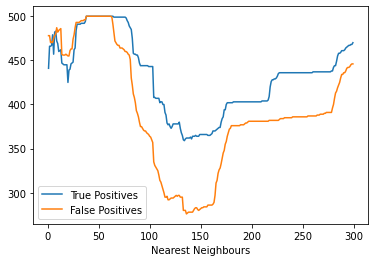

In [20]:
# plot performance for each value of nearest neighbour

plot_df = pd.DataFrame({"True Positives": tps, "False Positives": fps, "Nearest Neighbours": nns})
sns.lineplot(x="Nearest Neighbours", y=tps, data=plot_df, legend='brief', label="True Positives")
sns.lineplot(x="Nearest Neighbours", y=fps, data=plot_df, legend='brief', label="False Positives")

In [21]:
def remove_outliers(model, dataframe):
    '''
    Removes outliers within the train data
    '''

    is_inlier = model.predict(dataframe.drop(columns=['Id','Timestamp', 'Label'], axis = 1)) # 1 inlier, -1 outlier
    is_inlier = is_inlier == -1
    is_inlier = is_inlier.astype(float)

    drop_indices = np.where(is_inlier == 1)[0]
    dataframe = dataframe.drop(dataframe.index[drop_indices], axis=0)
    dataframe = dataframe.reset_index(drop=True)

    return dataframe, drop_indices, is_inlier

### 2a. Plot LOF scores

In [22]:
print('Without Cleaning')
lof_model, _, scores, _ = exec_lof(train_sample, val_sample, nearest_neighbor = 160)

Without Cleaning
True Positives: 366
False Positives: 286
F1: 0.6354166666666667
Precision: 0.5613496932515337
Recall: 0.732
Accuracy: 0.58


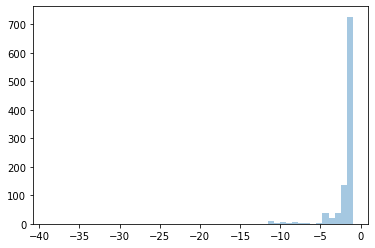

In [23]:
sns.distplot(scores, kde=False)
plt.show()

In [24]:
train_sample_clean, outliers_lof, labels = remove_outliers(lof_model, train_sample)

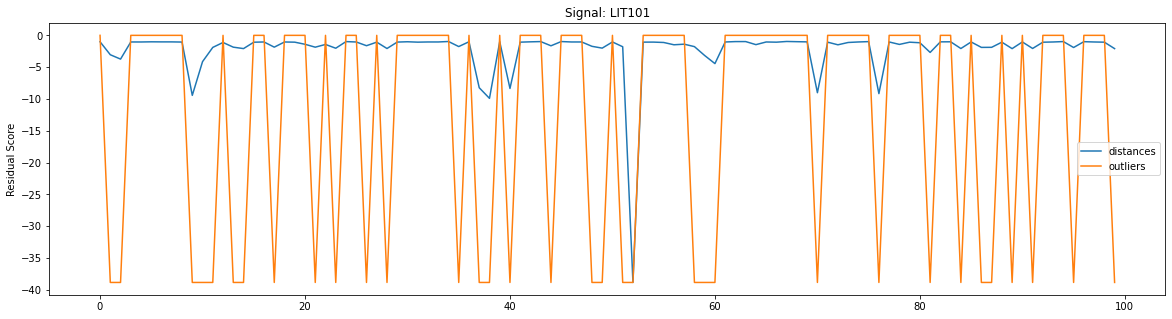

In [25]:
labels[outliers_lof] = min(scores)

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(scores[0:100], label='distances')
ax.plot(labels[0:100], label='outliers')
plt.title('Signal: LIT101')
plt.ylabel('Residual Score')
plt.legend()
plt.show()

In [26]:
print('With Cleaning')
_, _, scores, _ = exec_lof(train_sample_clean, val_sample, nearest_neighbor = 160)

With Cleaning
True Positives: 402
False Positives: 385
F1: 0.6247086247086248
Precision: 0.5108005082592122
Recall: 0.804
Accuracy: 0.517


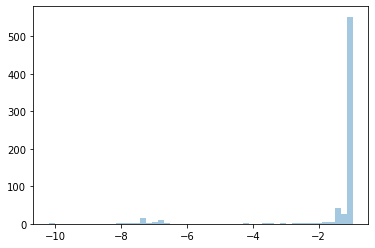

In [27]:
sns.distplot(scores, kde=False)
plt.show()

### 2b. Analysis and answers to the questions

**1. Do you see large abnormalities in the training data?** To-Do

**2. Can you explain why these occur?** To-Do

**3. It is best to remove such abnormalities from the training data since you only want to model normal behavior.** To-Do

**4. Describe the kind of anomalies you can detect using LOF**
To-Do


## 5. N-gram task – 1/2 A4 - Individual

In [28]:
# Global variable

TRAIN_SIGNATURES = []

MAX = 0.0
MIN = 0.0
BINS = None
APLHABETS = None

In [29]:
# ref: https://johannfaouzi.github.io/pyts/_modules/pyts/quantization/quantization.html#SAX

def discretise(signal, is_train=True, quantiles='linspace', levels=3):
    '''
    Discretise signal within levels
    '''
    
    global MIN, MAX, BINS, APLHABETS
    
    is_failed = False

    # normalise
    if is_train:
        MIN = signal.min()
        MAX = signal.max()

    signal = (signal - MIN) / (MAX - MIN)
    
    if MAX == MIN:
        is_failed = True
        
        # constant value signal
        return None, None, None, is_failed
    
    if is_train:
        
        # initialise the global variables
        
        APLHABETS = np.array([chr(i) for i in range(97, 97 + levels)])
        
        # insert additional character at starting and end to encode unseen values
        APLHABETS = np.insert(APLHABETS, 0, 'X')              
        APLHABETS = np.insert(APLHABETS, len(APLHABETS), 'X')
        
        if quantiles == 'linspace':
            BINS = np.linspace(0., 1., levels + 1)
        else:
            BINS = np.percentile(signal, np.linspace(0, 100, levels + 1))
            
        BINS[-1] += 1e-5 

    indices = np.array([np.digitize(signal, BINS)])
    
    coded_signals = APLHABETS[indices] # coded signal
    
    # handling for unseen values during test
    value_beyond_lim = np.where(indices == len(BINS))[0]
    
    if is_train:
        if len(value_beyond_lim) > 0:
            print(f'Incorrect Values')
    else:
        
        # since it will only be used for plotting here onwards
        # map back any point that falls outside the bins to the 
        # last bin
        
        indices[value_beyond_lim] = len(BINS) - 1
    
    try:
        discrete_signals = BINS[indices] # discretised signal
    except:
        print(indices)

    return  signal, coded_signals[0], discrete_signals[0], is_failed

In [30]:
# ref: https://www.nltk.org/_modules/nltk/util.html

def generate_n_grams(data_seq, n=0):
    '''
    generates all possible n-grams within a sequence 
    '''
    
    iterables = tee(data_seq, n)

    for i, sub_iterable in enumerate(iterables):  
        for _ in range(i):
            next(sub_iterable, None)
    
    # convert to strings 
    
    ngrams_seq = []
    
    for val in zip(*iterables) :
        n_gram_str = ''.join(val)
        
        ngrams_seq.append(n_gram_str)
            
    return ngrams_seq

In [31]:
def calc_freq(signal, is_train=True, window=3, overlap=0, n=2):
    '''
    calculate frequency of each n-gram within a window
    '''
    
    global TRAIN_SIGNATURES 
    
    signature = {} # dictinary with window index as key and ngram frequency as value
    
    # loop over all the windows
    
    start_pos = 0 
    window_count = 0
    
    while start_pos + window < len(signal):
        
        end_pos = start_pos + window
        
        ngrams_seq = generate_n_grams(signal[start_pos:end_pos], n) # generate ngrams 
        
        unique_vals, counts = np.unique(ngrams_seq, return_counts=True) # count frequency of each ngram
        
        curr_window = dict(zip(unique_vals, counts)) # dictionary with ngram as key and count as value
        
        if not is_train:
            
            signature[window_count] = {}
            
            # Remove freq for n_grams not in train set
            for key in TRAIN_SIGNATURES:
                if key in curr_window.keys():
                    signature[window_count][key] = curr_window[key]
        else:
            
            signature[window_count] = curr_window
        
        window_count += 1
        
        start_pos = end_pos - overlap
        
    signature_df = pd.DataFrame(signature).T
    signature_df.fillna(0, inplace=True)
    
    n_sample, _ = signature_df.shape
    
    # get frequency of same ngrams in both train and test sets
    if not is_train:
        
        missing_col_names  = list(set(TRAIN_SIGNATURES) - set(list(signature_df.columns)))  
        
        if len(missing_col_names) > 0:
            missing_cols = dict(zip(missing_col_names, [np.zeros(n_sample)]*len(missing_col_names)))
        
            signature_df = pd.concat([signature_df.reset_index(drop=True), 
                                      pd.DataFrame(missing_cols).reset_index(drop=True)], 
                                     axis = 1)

            signature_df = signature_df[TRAIN_SIGNATURES]
        
    else:
        TRAIN_SIGNATURES = []
        TRAIN_SIGNATURES = list(signature_df.columns)
    
    return signature_df

In [32]:
def predictions(train_signatures, test_signatures, pred_signal, threshold = 0.04, derive_threshold = False):
    '''
    predicts whether each window in test set is anomalous
    '''
    
    neigh = NearestNeighbors(n_neighbors=1, metric='cosine')
    neigh.fit(train_signatures.values)
    
    # find distances to the nearest neigbour
    distances, _ = neigh.kneighbors(test_signatures.values, return_distance = True)
    
    if derive_threshold:
        threshold = np.percentile(distances, threshold)
    
    # mark anomalous if distance more than threshold
    anomalous = np.where(distances.reshape(-1) > threshold)
    
    # map back from windows to data points
    for window_count in anomalous[0]:

        start_pos = (WINDOW * window_count) - (OVERLAP * window_count)

        end_pos = start_pos + WINDOW

        pred_signal[start_pos:end_pos] = 1
    
    return distances, pred_signal

### 5a. Visualise discretization

#### Signal: LIT101

In [33]:
# hyperparameters for 'LIT101'

N = 4 
LEVELS = 10
WINDOW = 1000
OVERLAP = 0
THRESHOLD = 0.04 # decided based on the nearest neighbor distance plot found below
QUANTILES = 'linspace' # can be 'linspace' or 'percentiles'

In [34]:
# train set

signal = train_df[['LIT101']].values
signal = signal.reshape(-1)

norm_signal, coded_signal, discrete_signal, _ = discretise(signal, quantiles=QUANTILES,  levels=LEVELS)

signature = calc_freq(coded_signal, window=WINDOW, overlap=OVERLAP, n=N)

In [35]:
# table showing windows in rows and ngrams in columns

signature.head() # only head printed for efficiency

,aaaa,baaa,bbaa,bbba,bbbb,bbbj,bbjj,bjjj,jbbb,jjbb,...,efef,feff,gghg,ghgh,hghh,efee,fefe,ffef,ghhg,hhgh
0,371.0,1.0,1.0,1.0,602.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,589.0,0.0,0.0,0.0,405.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,997.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,997.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# validation set

val_signal = val_df[['LIT101']].values
val_signal = val_signal.reshape(-1)

norm_signal_v, coded_signal_v, discrete_signal_v, _ = discretise(val_signal, quantiles=QUANTILES, is_train = False, levels=LEVELS)

val_signature = calc_freq(coded_signal_v, is_train = False, window=WINDOW, overlap=OVERLAP, n=N)

In [37]:
# table showing windows in rows and ngrams in columns

val_signature.head() # only head printed for efficiency

,aaaa,baaa,bbaa,bbba,bbbb,bbbj,bbjj,bjjj,jbbb,jjbb,...,efef,feff,gghg,ghgh,hghh,efee,fefe,ffef,ghhg,hhgh
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# get predictions

pred_signal = np.zeros(len(val_signal))
distances, pred_signal = predictions(signature, val_signature, pred_signal, threshold = THRESHOLD)

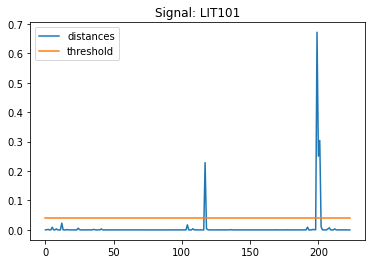

In [39]:
# distance of each data point from its nearest neighbor

plt.plot(distances, label='distances')
plt.plot(range(len(distances)), np.array([THRESHOLD] * len(distances)), label='threshold')
plt.title('Signal: LIT101')
plt.legend()
plt.show()

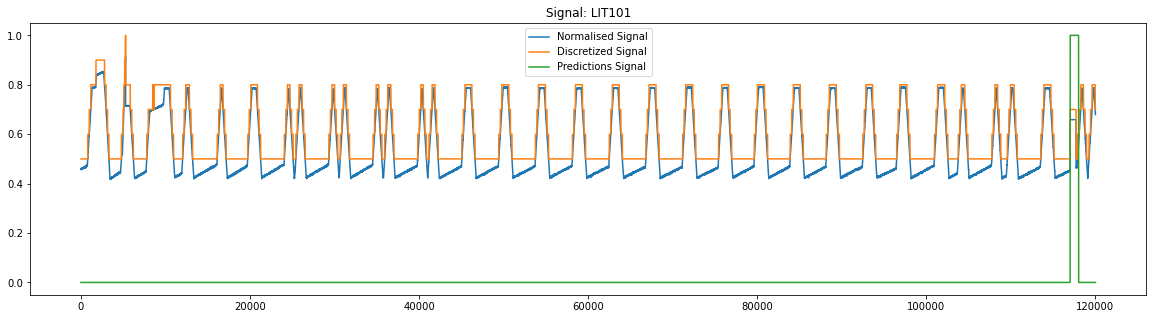

In [40]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(norm_signal_v[:120000], label='Normalised Signal')
ax.plot(discrete_signal_v[:120000], label='Discretized Signal')
ax.plot(pred_signal[:120000], label='Predictions Signal')

plt.title('Signal: LIT101')
plt.legend()
plt.show()

In [41]:
# hyperparameters for 'LIT101' with differencing

N = 4 
LEVELS = 10
WINDOW = 100
OVERLAP = 0
THRESHOLD = 0.03 # decided based on the nearest neighbor distance plot found below
QUANTILES = 'linspace' # can be 'linspace' or 'percentiles'

In [42]:
# Apply differencing for train set

signal = train_df[['LIT101']]
signal['Diff'] = signal['LIT101'].diff()
signal = signal.fillna(0)

signal= signal[['Diff']].values
signal = signal.reshape(-1)

norm_signal, coded_signal, discrete_signal, _ = discretise(signal, quantiles=QUANTILES, levels=LEVELS)

signature = calc_freq(coded_signal, window=WINDOW, overlap=OVERLAP, n=N)

In [43]:
# Apply differencing for validation set

val_signal = val_df[['LIT101']]
val_signal['Diff'] = val_signal['LIT101'].diff()
val_signal = val_signal.fillna(0)

val_signal = val_signal[['Diff']].values
val_signal = val_signal.reshape(-1)

norm_signal_v, coded_signal_v, discrete_signal_v, _ = discretise(val_signal, 
                                                                 quantiles=QUANTILES, 
                                                                 is_train = False, 
                                                                 levels=LEVELS)

val_signature = calc_freq(coded_signal_v, is_train = False, window=WINDOW, overlap=OVERLAP, n=N)

In [44]:
# get predictions

pred_signal = np.zeros(len(val_signal))
distances, pred_signal = predictions(signature, val_signature, pred_signal, threshold = THRESHOLD)

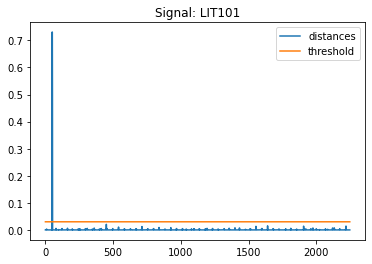

In [45]:
# distance of each data point from its nearest neighbor

plt.plot(distances, label='distances')
plt.plot(range(len(distances)), np.array([THRESHOLD] * len(distances)), label='threshold')
plt.title('Signal: LIT101')
plt.legend()
plt.show()

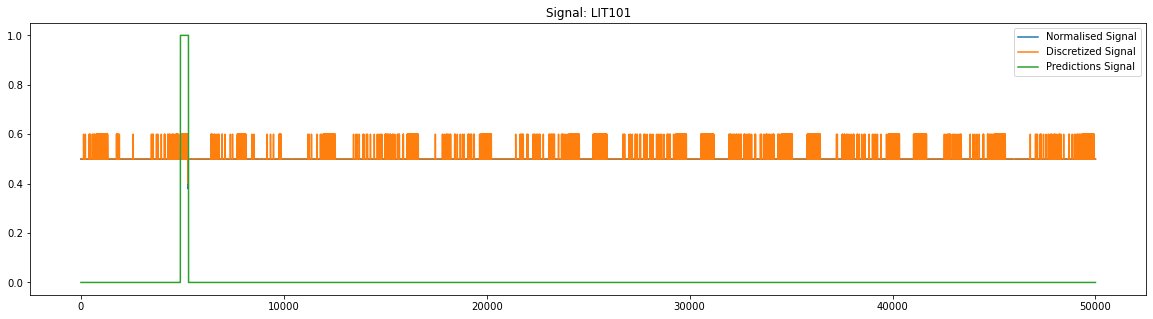

In [46]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(norm_signal_v[:50000], label='Normalised Signal')
ax.plot(discrete_signal_v[:50000], label='Discretized Signal')
ax.plot(pred_signal[:50000], label='Predictions Signal')

plt.title('Signal: LIT101')
plt.legend()
plt.show()

#### Signal: FIT301

In [47]:
# hyperparameters for 'FIT301'

N = 4 
LEVELS = 10
WINDOW = 1000
OVERLAP = 0
THRESHOLD = 0.015 # decided based on the nearest neighbor distance plot found below
QUANTILES = 'linspace' # can be 'linspace' or 'percentiles'

In [48]:
# train set

signal = train_df[['FIT301']].values
signal = signal.reshape(-1)

norm_signal, coded_signal, discrete_signal, _ = discretise(signal, quantiles=QUANTILES,  levels=LEVELS)

signature = calc_freq(coded_signal, window=WINDOW, overlap=OVERLAP, n=N)

In [49]:
# table showing windows in rows and ngrams in columns

signature.head() # only head printed for efficiency

,aaaa,baaa,bbaa,cbba,ecbb,fecb,gfec,igfe,jigf,jjig,...,ihgd,fccb,gfcc,igfc,ggdc,iggd,deff,effh,degi,egii
0,794.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,934.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,107.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# validation set

val_signal = val_df[['FIT301']].values
val_signal = val_signal.reshape(-1)

norm_signal_v, coded_signal_v, discrete_signal_v, _ = discretise(val_signal, 
                                                                 quantiles=QUANTILES, 
                                                                 is_train = False, 
                                                                 levels=LEVELS)

val_signature = calc_freq(coded_signal_v, is_train = False, window=WINDOW, overlap=OVERLAP, n=N)

In [51]:
# table showing windows in rows and ngrams in columns

val_signature.head() # only head printed for efficiency

,aaaa,baaa,bbaa,cbba,ecbb,fecb,gfec,igfe,jigf,jjig,...,ihgd,fccb,gfcc,igfc,ggdc,iggd,deff,effh,degi,egii
0,278.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,331.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# get predictions

pred_signal = np.zeros(len(val_signal))
distances, pred_signal = predictions(signature, val_signature, pred_signal, threshold = THRESHOLD)

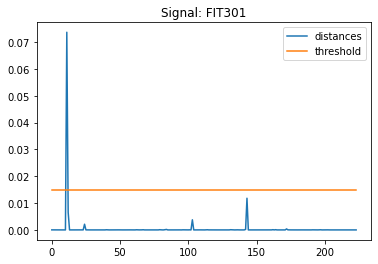

In [53]:
# distance of each data point from its nearest neighbor

plt.plot(distances, label='distances')
plt.plot(range(len(distances)), np.array([THRESHOLD] * len(distances)), label='threshold')
plt.title('Signal: FIT301')
plt.legend()
plt.show()

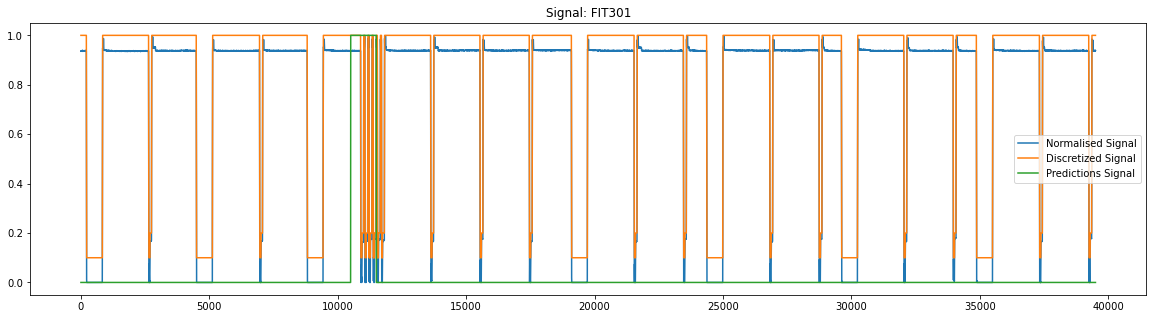

In [54]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(norm_signal_v[500:40000], label='Normalised Signal')
ax.plot(discrete_signal_v[500:40000], label='Discretized Signal')
ax.plot(pred_signal[500:40000], label='Predictions Signal')

plt.title('Signal: FIT301')
plt.legend()
plt.show()

In [55]:
# hyperparameters for 'FIT301' with differencing

N = 4 
LEVELS = 10
WINDOW = 1000
OVERLAP = 0
THRESHOLD = 0.0006 # decided based on the nearest neighbor distance plot found below
QUANTILES = 'linspace' # can be 'linspace' or 'percentiles'

In [56]:
# Apply differencing for train set

signal = train_df[['FIT301']]
signal['Diff'] = signal['FIT301'].diff()
signal = signal.fillna(0)

signal= signal[['Diff']].values
signal = signal.reshape(-1)

norm_signal, coded_signal, discrete_signal, _ = discretise(signal, quantiles=QUANTILES, levels=LEVELS)

signature = calc_freq(coded_signal, window=WINDOW, overlap=OVERLAP, n=N)

In [57]:
# Apply differencing for validation set

val_signal = val_df[['FIT301']]
val_signal['Diff'] = val_signal['FIT301'].diff()
val_signal = val_signal.fillna(0)

val_signal = val_signal[['Diff']].values
val_signal = val_signal.reshape(-1)

norm_signal_v, coded_signal_v, discrete_signal_v, _ = discretise(val_signal, 
                                                                 quantiles=QUANTILES, 
                                                                 is_train = False, 
                                                                 levels=LEVELS)

val_signature = calc_freq(coded_signal_v, is_train = False, window=WINDOW, overlap=OVERLAP, n=N)

In [58]:
# get predictions

pred_signal = np.zeros(len(val_signal))
distances, pred_signal = predictions(signature, val_signature, pred_signal, threshold = THRESHOLD)

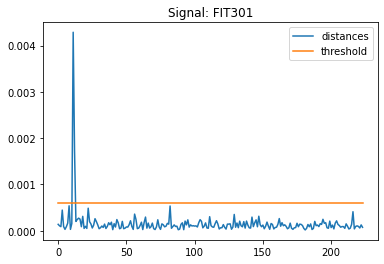

In [59]:
# distance of each data point from its nearest neighbor

plt.plot(distances, label='distances')
plt.plot(range(len(distances)), np.array([THRESHOLD] * len(distances)), label='threshold')
plt.title('Signal: FIT301')
plt.legend()
plt.show()

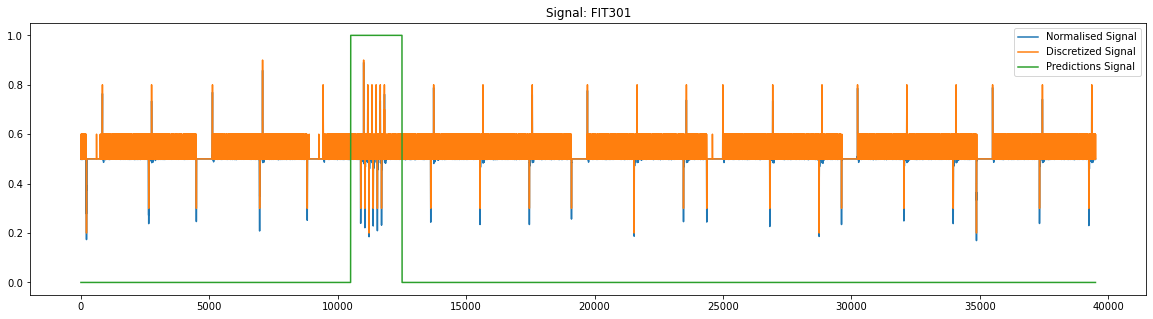

In [60]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(norm_signal_v[500:40000], label='Normalised Signal')
ax.plot(discrete_signal_v[500:40000], label='Discretized Signal')
ax.plot(pred_signal[500:40000], label='Predictions Signal')

plt.title('Signal: FIT301')
plt.legend()
plt.show()

#### Multivariate Analysis

In [61]:
# hyperparameters for multivariate

N = 4 
LEVELS = 10
WINDOW = 1000
OVERLAP = 500
THRESHOLD = 98 # threshold is 98 percentile
DERIVE_THRESHOLD = True
QUANTILES = 'linspace' # can be 'linspace' or 'percentiles'

In [62]:
def multivariate_predict(train_dataframe, test_dataframe, chk_perf=True, column_list=None):
    '''
    predicts labels based on each signal
    '''
    
    pred_per_col = {}
    metric_per_col = {}
    
    for col in tqdm(column_list):
        
        # train set
        
        signal = train_dataframe[[col]]
        signal['Diff'] = signal[col].diff()
        signal = signal.fillna(0)

        signal= signal[['Diff']].values
        signal = signal.reshape(-1)

        _, coded_signal, _, is_failed = discretise(signal, quantiles=QUANTILES, is_train = True, levels=LEVELS)
        
        if is_failed:
            continue

        signature = calc_freq(coded_signal, window=WINDOW, overlap=OVERLAP, n=N)
        
        # validation set

        val_signal = test_dataframe[[col]]
        val_signal['Diff'] = val_signal[col].diff()
        val_signal = val_signal.fillna(0)

        val_signal= val_signal[['Diff']].values
        val_signal = val_signal.reshape(-1)

        _, coded_signal_v, _, is_failed = discretise(val_signal, quantiles=QUANTILES, is_train = False, levels=LEVELS)

        val_signature = calc_freq(coded_signal_v, is_train = False, window=WINDOW, overlap=OVERLAP, n=N)
        
        # get predictions

        pred_signal = np.zeros(len(val_signal))
        _, pred_signal = predictions(signature, 
                                     val_signature, 
                                     pred_signal, 
                                     threshold = THRESHOLD, 
                                     derive_threshold = DERIVE_THRESHOLD)
        
        pred_per_col[col] = pred_signal
        
        if chk_perf:
            metric_per_col[col] = {}
            _, fp, _, tp = confusion_matrix(test_dataframe.Label, pred_signal).ravel()

            metric_per_col[col]['fp'] = fp
            metric_per_col[col]['tp'] = tp
            metric_per_col[col]['F1'] = f1_score(test_dataframe.Label, pred_signal)
            metric_per_col[col]['Precision'] = precision_score(test_dataframe.Label, pred_signal)
            metric_per_col[col]['Recall'] = recall_score(test_dataframe.Label, pred_signal)
            metric_per_col[col]['Accuracy'] = accuracy_score(test_dataframe.Label, pred_signal)
        
    return pd.DataFrame(pred_per_col), pd.DataFrame(metric_per_col)

In [63]:
preds, perf = multivariate_predict(train_df, val_df, column_list=sensors)

100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [01:04<00:00,  1.27s/it]


In [64]:
# Aggregate results such that if atleast one of the signal states anomaly the datapoint is marked anomalous 

max_pred = preds.aggregate('max', axis=1)

_, fp, _, tp = confusion_matrix(val_df.Label, max_pred).ravel()

# Performance Metrics
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'F1: {f1_score(val_df.Label, max_pred)}')
print(f'Precision: {precision_score(val_df.Label, max_pred)}')
print(f'Recall: {recall_score(val_df.Label, max_pred)}')
print(f'Accuracy: {accuracy_score(val_df.Label, max_pred)}')

True Positives: 6923
False Positives: 104577
F1: 0.11299536462753802
Precision: 0.06208968609865471
Recall: 0.6273106197897789
Accuracy: 0.5168452918087296


#### Kaggle Submission

In [65]:
scaling = StandardScaler()
scaling.fit(train_df.drop(columns=['Id', 'Timestamp', 'Label'], axis = 1))
scaled_train_data = scaling.transform(train_df.drop(columns=['Id', 'Timestamp', 'Label'], axis = 1))
scaled_val_data = scaling.transform(val_df.drop(columns=['Id', 'Timestamp', 'Label'], axis = 1))

pca = PCA(n_components=0.9) # select components that can explain 90% of the variance
pca.fit(scaled_train_data)

train_pca = pca.transform(scaled_train_data)
train_pca_df = pd.DataFrame(train_pca)

val_pca = pca.transform(scaled_val_data)
val_pca_df = pd.DataFrame(val_pca)
val_pca_df = pd.concat([val_pca_df.reset_index(drop=True),
                       val_df[['Label']].reset_index(drop=True)],
                      axis = 1)

In [66]:
preds, perf = multivariate_predict(train_pca_df, val_pca_df, column_list=train_pca_df.columns)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:15<00:00,  1.53s/it]


In [67]:
# Aggregate results such that if atleast one of the signal states anomaly the datapoint is marked anomalous 

max_pred = preds.aggregate('max', axis=1)

_, fp, _, tp = confusion_matrix(val_df.Label, max_pred).ravel()

# Performance Metrics
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'F1: {f1_score(val_df.Label, max_pred)}')
print(f'Precision: {precision_score(val_df.Label, max_pred)}')
print(f'Recall: {recall_score(val_df.Label, max_pred)}')
print(f'Accuracy: {accuracy_score(val_df.Label, max_pred)}')

True Positives: 6823
False Positives: 35677
F1: 0.2548939031679618
Precision: 0.16054117647058824
Recall: 0.6182493657122146
Accuracy: 0.8226787992478629


In [68]:
scaled_test_data = scaling.transform(test_df.drop(columns=['Id', 'Timestamp'], axis = 1))

test_pca = pca.transform(scaled_test_data)
test_pca_df = pd.DataFrame(test_pca)

In [69]:
preds, _ = multivariate_predict(train_pca_df, test_pca_df, chk_perf=False, column_list=train_pca_df.columns)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.23s/it]


In [79]:
# Aggregate results such that if atleast one of the signal states anomaly the datapoint is marked anomalous 

max_pred = preds.aggregate('max', axis=1)
max_pred = pd.concat([max_pred.reset_index(drop=True), 
                      test_df[['Id']].reset_index(drop=True)],
                     axis = 1)
max_pred = max_pred.rename({'index': 'Id', 0: 'Label'}, axis=1) 
max_pred = max_pred[['Id', 'Label']]
max_pred['Label'] = max_pred['Label'].astype(int)

In [81]:
max_pred.to_csv('data/submission.csv', index=False)

### 5b. Analysis and answers to the questions. Also provide relevant plots.

**1. Does differencing improve performance? Explain** To-Do

**2. What kind of anomalies can you detect?** To-Do

**3. Which kind of sensors can be modeled effectively using N-grams?** To-Do

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.